## Практика 13


### Задание 1. Загрузка данных

In [828]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apriori_python import apriori as apriori_first
from apyori import apriori as apriori_second
from efficient_apriori import apriori as apriori_third
from fpgrowth_py import fpgrowth
import time

In [829]:
data = pd.read_csv('Market_Basket_Optimisation.csv')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [830]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [831]:
data.isna().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [832]:
data.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


### Задание 2. Визуализация данных

In [833]:
data.stack().value_counts()

mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

In [834]:
data.stack().value_counts(normalize=True)

mineral water    0.060900
eggs             0.045939
spaghetti        0.044508
french fries     0.043690
chocolate        0.041918
                   ...   
bramble          0.000477
cream            0.000239
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

<AxesSubplot: >

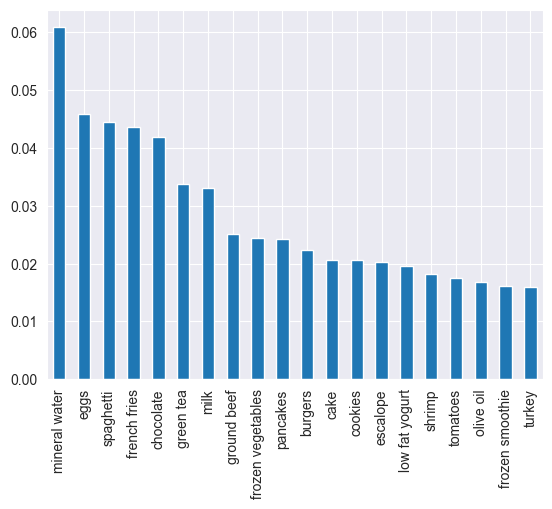

In [835]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar')

<AxesSubplot: >

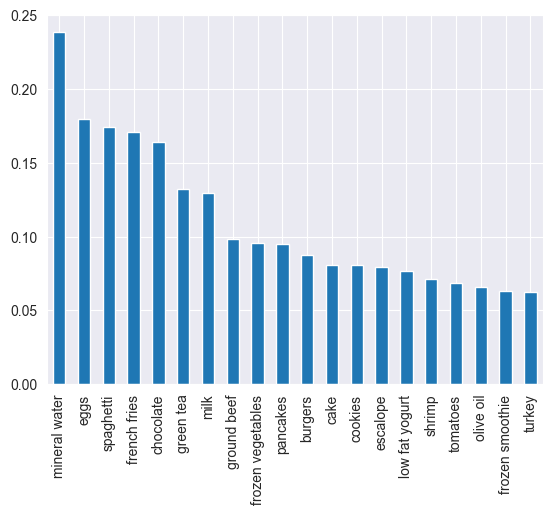

In [836]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[:20].plot(kind='bar')

### Задание 3. Алгоритм Apriori

In [837]:
products = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    products.append(row)

In [838]:
products[0][0]

'burgers'

In [839]:
products[0]

['burgers', 'meatballs', 'eggs']

In [840]:
start_time = time.time()
t1, rules = apriori_first(products, minSup = 0.01, minConf = 0.46)
apriori_f_time = time.time() - start_time

In [841]:
rules

[[{'frozen vegetables', 'milk'}, {'mineral water'}, 0.4689265536723164],
 [{'chocolate', 'ground beef'}, {'mineral water'}, 0.47398843930635837],
 [{'ground beef', 'milk'}, {'mineral water'}, 0.503030303030303],
 [{'eggs', 'ground beef'}, {'mineral water'}, 0.5066666666666667]]

In [842]:
start_time = time.time()
rules = apriori_second(transactions=products,
                       min_support = 0.01,
                       min_confidence = 0.46,
                       min_lift=1.0001)
apriori_s_time = time.time() - start_time
results = list(rules)

In [843]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};\n".format(result[1], subset[2], subset[3]))

frozenset({'chocolate', 'ground beef'}) frozenset({'mineral water'})
Support: 0.010933333333333333; Confidence: 0.47398843930635837; Lift: 1.9893191353092825;

frozenset({'ground beef', 'eggs'}) frozenset({'mineral water'})
Support: 0.010133333333333333; Confidence: 0.5066666666666666; Lift: 2.1264689423614995;

frozenset({'frozen vegetables', 'milk'}) frozenset({'mineral water'})
Support: 0.011066666666666667; Confidence: 0.46892655367231645; Lift: 1.968074511775251;

frozenset({'milk', 'ground beef'}) frozenset({'mineral water'})
Support: 0.011066666666666667; Confidence: 0.503030303030303; Lift: 2.1112072035407237;



In [844]:
start_time = time.time()
itemsets, rules = apriori_third(products, min_support = 0.01, min_confidence = 0.46)
apriori_t_time = time.time() - start_time

In [845]:
for i in range(len(rules)):
    print(rules[i])

{chocolate, ground beef} -> {mineral water} (conf: 0.474, supp: 0.011, lift: 1.989, conv: 1.448)
{eggs, ground beef} -> {mineral water} (conf: 0.507, supp: 0.010, lift: 2.126, conv: 1.544)
{frozen vegetables, milk} -> {mineral water} (conf: 0.469, supp: 0.011, lift: 1.968, conv: 1.434)
{ground beef, milk} -> {mineral water} (conf: 0.503, supp: 0.011, lift: 2.111, conv: 1.533)


### Задание 4. Алгоритм FP-Growth

In [846]:
start_time = time.time()
itemsets, rules = fpgrowth(products, 0.01, 0.46)
fpgrowth_time = time.time() - start_time

In [847]:
for i in range(len(rules)):
    print(rules[i])

[{'frozen vegetables', 'milk'}, {'mineral water'}, 0.4689265536723164]
[{'ground beef', 'eggs'}, {'mineral water'}, 0.5066666666666667]
[{'milk', 'ground beef'}, {'mineral water'}, 0.503030303030303]
[{'ground beef', 'chocolate'}, {'mineral water'}, 0.47398843930635837]


### Задание 5. Сравнение алгоритмов

In [848]:
time_data = pd.DataFrame({'apriori 1': [apriori_f_time],
                          'apriori 2': [apriori_s_time],
                          'efficient_apriori': [apriori_t_time],
                          'fpgrowth': [fpgrowth_time]})
time_data

,apriori 1,apriori 2,efficient_apriori,fpgrowth
0,13.183469,0.0,0.089213,5.611431


<BarContainer object of 4 artists>

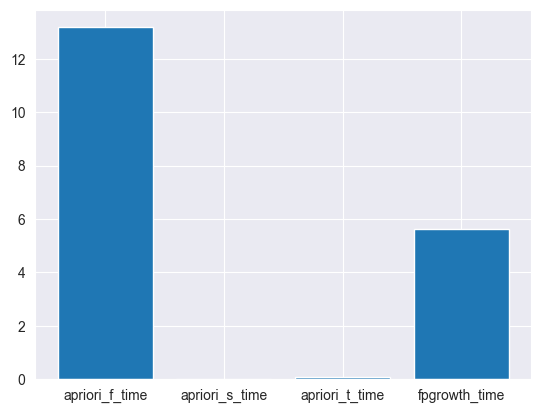

In [849]:
plt.bar(['apriori_f_time','apriori_s_time','apriori_t_time','fpgrowth_time'], time_data.iloc[0])

### Задание 6. Загрузка данных

In [850]:
data = pd.read_csv('data.csv')
data.head()

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Задание 7. Визуализация данных

In [851]:
data.stack().value_counts()

Coffee              5471
Bread               3324
Tea                 1435
Cake                1025
Pastry               856
                    ... 
Olum & polenta         1
Gift voucher           1
Coffee granules        1
Raw bars               1
Chicken sand           1
Length: 102, dtype: int64

In [852]:
data.stack().value_counts(normalize=True)

Coffee              0.266800
Bread               0.162099
Tea                 0.069980
Cake                0.049985
Pastry              0.041744
                      ...   
Olum & polenta      0.000049
Gift voucher        0.000049
Coffee granules     0.000049
Raw bars            0.000049
Chicken sand        0.000049
Length: 102, dtype: float64

<AxesSubplot: >

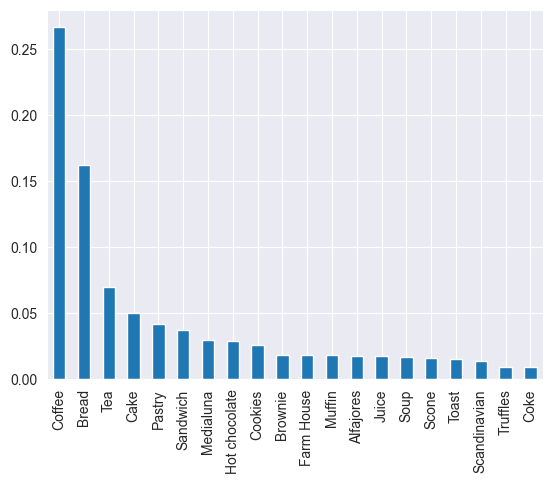

In [853]:
data.stack().value_counts(normalize=True)[:20].plot(kind='bar')

<AxesSubplot: >

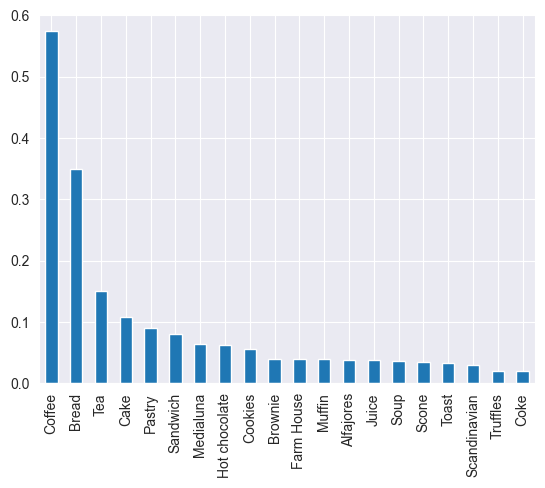

In [854]:
data.stack().value_counts().apply(lambda item: item / data.shape[0])[:20].plot(kind='bar')

### Задание 8. Алгоритм Apriori

In [855]:
products = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    products.append(row)

In [856]:
products[0][0]

'Scandinavian'

In [857]:
products[0]

['Scandinavian', 'Scandinavian']

In [858]:
start_time = time.time()
t1, rules = apriori_first(products, minSup = 0.03, minConf = 0.46)
apriori_f_time = time.time() - start_time

In [859]:
rules

[[{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]]

In [860]:
start_time = time.time()
rules = apriori_second(transactions=products,
                       min_support = 0.03,
                       min_confidence = 0.46,
                       min_lift=1.0001)
apriori_s_time = time.time() - start_time
results = list(rules)

In [861]:
for result in results:
    for subset in result[2]:
        print(subset[0], subset[1])
        print("Support: {0}; Confidence: {1}; Lift: {2};\n".format(result[1], subset[2], subset[3]))

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence: 0.5269582909460834; Lift: 1.109079618532724;

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116475; Confidence: 0.5692307692307693; Lift: 1.1980497417776572;

frozenset({'Pastry'}) frozenset({'Coffee'})
Support: 0.0472193074501574; Confidence: 0.5521472392638037; Lift: 1.162094344121919;

frozenset({'Sandwich'}) frozenset({'Coffee'})
Support: 0.037985309548793283; Confidence: 0.5323529411764706; Lift: 1.1204336416545417;



In [862]:
start_time = time.time()
itemsets, rules = apriori_third(products, min_support = 0.03, min_confidence = 0.46)
apriori_t_time = time.time() - start_time

In [863]:
for i in range(len(rules)):
    print(rules[i])

{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)


### Задание 9. Алгоритм FP-Growth

In [870]:
start_time = time.time()
itemsets, rules = fpgrowth(products, minSupRatio=0.03, minConf=0.46)
fpgrowth_time = time.time() - start_time

In [871]:
for i in range(len(rules)):
    print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]


### Задание 10. Сравнение алгоритмов

In [866]:
time_data = pd.DataFrame({'apriori 1': [apriori_f_time],
                          'apriori 2': [apriori_s_time],
                          'efficient_apriori': [apriori_t_time],
                          'fpgrowth': [fpgrowth_time]})
time_data

,apriori 1,apriori 2,efficient_apriori,fpgrowth
0,1.104153,0.0,0.012238,0.424028


<BarContainer object of 4 artists>

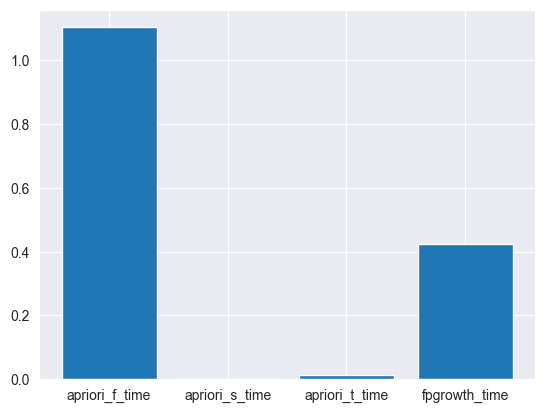

In [867]:
plt.bar(['apriori_f_time','apriori_s_time','apriori_t_time','fpgrowth_time'], time_data.iloc[0])